In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import altair as alt
import matplotlib.pyplot as plt

import os

df_train = pd.read_csv(f'../data/interim/train_data/all_train.csv')
data_dict = pd.read_json(f'../data/interim/data_dictionary_v1.json')
df_test = pd.read_csv(f'../data/interim/test_data/all_test.csv')

Show data_dict with column descriptions:

In [52]:
print(f'Train shape = {df_train.shape} , test shape = {df_test.shape}')

Train shape = (5521, 87) , test shape = (2928, 53)


A crapload of features, let's do a quick describe:

In [86]:
df_train.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
final.output.concentrate_fe,16788.0,4.716907,2.096718,0.0,3.971262,4.869346,5.821176,16.001945
final.output.concentrate_pb,16788.0,9.113559,3.389495,0.0,8.825748,10.065316,11.054809,17.031899
final.output.concentrate_sol,16490.0,8.301123,3.825760,0.0,6.939185,8.557228,10.289741,18.124851
final.output.concentrate_zn,16789.0,39.467217,13.917227,0.0,42.055722,44.498874,45.976222,53.611374
final.output.recovery,15339.0,67.213166,11.960446,0.0,62.625685,67.644601,72.824595,100.000000


There are some columns with `output` in the name.. Those are not available at the test prediction, and thus not super useful yet. Although in TODO list I'd add a possibility to build the model using `output` predictors and compare on local CV the quality of predictions with the model that uses test columns only

In [237]:
df_train.filter(regex = 'output',axis =1).head()

,final.output.concentrate_fe,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_zn,final.output.recovery,final.output.tail_fe,final.output.tail_pb,final.output.tail_sol,final.output.tail_zn,primary_cleaner.output.concentrate_fe,...,rougher.output.concentrate_zn,rougher.output.recovery,rougher.output.tail_fe,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_zn,secondary_cleaner.output.tail_fe,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_zn
0,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,8.547551,...,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,14.500184,4.694824,8.764648,2.606185
1,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,8.558743,...,20.050975,86.843261,4.955378,0.536689,18.965234,1.184827,14.265474,4.592547,9.001494,2.488248
2,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,8.603505,...,19.737170,86.842308,4.843460,0.546416,18.808533,1.162562,14.115662,4.624775,8.842896,2.458187
3,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,7.221879,...,19.320810,87.226430,4.655288,0.542525,19.330200,1.079755,13.732071,4.482453,9.122857,2.322062
4,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,9.089428,...,19.216101,86.688794,4.552800,0.515438,19.267422,1.012642,14.079996,4.470737,8.871028,2.330448


In [314]:
pd.set_option('display.max_rows',60)
data_dict

,description,is_input,is_output,is_state,is_target,name,units
0,Timestamp of measurements,False,False,False,False,date,None
1,Plant Feed rate t/hr,True,False,False,False,rougher.input.feed_rate,t/hr
2,Plant Feed Pb%,True,False,False,False,rougher.input.feed_pb,%
3,Plant Feed Zn%,True,False,False,False,rougher.input.feed_zn,%
4,Plant Feed Fe%,True,False,False,False,rougher.input.feed_fe,%
5,Plant Feed Sol%,True,False,False,False,rougher.input.feed_sol,%
6,Rougher Con Pb%,False,True,False,False,rougher.output.concentrate_pb,%
7,Rougher Con Zn%,False,True,False,False,rougher.output.concentrate_zn,%
8,Rougher Con Fe%,False,True,False,False,rougher.output.concentrate_fe,%
9,Rougher Con Sol%,False,True,False,False,rougher.output.concentrate_sol,%


Lets quickly run `pandas-profiling` report on training data to see the correlation / high cardinality / low variance variables

In [22]:
import pandas_profiling as pdpr
rep_train = pdpr.ProfileReport(df_train)
rep_test = pdpr.ProfileReport(df_test)

rep_train.to_file(outputfile="../reports/train_output.html")
rep_test.to_file(outputfile="../reports/test_output.html")


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/pandas_profiling/plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/geoanton/anaconda3/envs/zinc/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/geoanton/anaconda3/envs/zinc/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/geoanton/anaconda3/envs/zi

Seems like there are a lot of features correlated, mainly corresponding to the same main *source* of information (e.g. `feed` , `floatbank` features). We should not necessarily throw one of them away, but rather eliminate them in a justifiable fashion (RFE?)

Let's do a few more plots:

- each feature vs time
- pair-wise plots between features

and dump them into a `png` file

First, the pairplot: (only for columns in the `df_test`). I wi ll also use R's ggpairs, since they are much faster than python's seaborn

In [32]:
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate(u"\u03C1 = {:.2f}".format(r), #unicode code for lowercase rho (ρ)
                xy=(.1, .9), xycoords=ax.transAxes)
cols =df_test.columns.difference(['date'])
#print(cols)
df_train_small = df_train[cols]
df_test_small = df_test[cols]
#g = sns.pairplot(df_train[cols])
#g.map_lower(corrfunc)
#g.get_figure().savefig('../reports/figures/train_pairs.png',figsize  = (40,40))
%load_ext rpy2.ipython


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
%%R -i df_train_small -i df_test_small
library(GGally)
library(ggplot2)
p = ggpairs(df_train_small)
ggsave('pairs-train.png',p,width = 40,height =40)



In [ ]:
%%R -i df_train_small -i df_test_small
library(GGally)
library(ggplot2)
ptest = ggpairs(df_test_small)

ggsave('pairs-test.png',ptest,width = 40,height =40)

In [ ]:
g_test = sns.pairplot(df_test[cols])
g_test.map_lower(corrfunc)
g_test.get_figure().savefig('../reports/figures/train_pairs.png',figsize  = (40,40))

### Plot series over time:


In [69]:
df_all = pd.concat([df_train[df_test.columns],df_test],keys = ['train','test']).reset_index(level=1,drop=True)
df_all['date'] = pd.to_datetime(df_all['date'],errors ='coerce')
df_all['Year'] = df_all['date'].dt.year
df_all.set_index(['date','Year'],append = True,inplace=True)
alt.data_transformers.enable('default', max_rows=None)
df_all.head()

primary_cleaner.input.copper_sulfate  \
      date                      Year                                         
train 2016-01-15 00:00:00+00:00 2016                            127.092003   
      2016-01-15 01:00:00+00:00 2016                            125.629232   
      2016-01-15 02:00:00+00:00 2016                            123.819808   
      2016-01-15 03:00:00+00:00 2016                            122.270188   
      2016-01-15 04:00:00+00:00 2016                            117.988169   

                                      primary_cleaner.input.depressant  \
      date                      Year                                     
train 2016-01-15 00:00:00+00:00 2016                         10.128295   
      2016-01-15 01:00:00+00:00 2016                         10.296251   
      2016-01-15 02:00:00+00:00 2016                         11.316280   
      2016-01-15 03:00:00+00:00 2016                         11.322140   
      2016-01-15 04:00:00+00:00 2016                         11.913613   

                                      primary_cleaner.input.feed_size  \
      date                      Year                                    
train 2016-01-15 00:00:00+00:00 2016                             7.25   
      2016-01-15 01:00:00+00:00 2016                             7.25   
      2016-01-15 02:00:00+00:00 2016                             7.25   
      2016-01-15 03:00:00+00:00 2016                             7.25   
      2016-01-15 04:00:00+00:00 2016                             7.25   

                                      primary_cleaner.input.xanthate  \
      date                      Year                                   
train 2016-01-15 00:00:00+00:00 2016                        0.988759   
      2016-01-15 01:00:00+00:00 2016                        1.002663   
      2016-01-15 02:00:00+00:00 2016                        0.991265   
      2016-01-15 03:00:00+00:00 2016                        0.996739   
      2016-01-15 04:00:00+00:00 2016                        1.009869   

                                      primary_cleaner.state.floatbank8_a_air  \
      date                      Year                                           
train 2016-01-15 00:00:00+00:00 2016                             1549.775757   
      2016-01-15 01:00:00+00:00 2016                             1576.166671   
      2016-01-15 02:00:00+00:00 2016                             1601.556163   
      2016-01-15 03:00:00+00:00 2016                             1599.968720   
      2016-01-15 04:00:00+00:00 2016                             1601.339707   

                                      primary_cleaner.state.floatbank8_a_level  \
      date                      Year                                             
train 2016-01-15 00:00:00+00:00 2016                               -498.912140   
      2016-01-15 01:00:00+00:00 2016                               -500.904965   
      2016-01-15 02:00:00+00:00 2016                               -499.997791   
      2016-01-15 03:00:00+00:00 2016                               -500.951778   
      2016-01-15 04:00:00+00:00 2016                               -498.975456   

                                      primary_cleaner.state.floatbank8_b_air  \
      date                      Year                                           
train 2016-01-15 00:00:00+00:00 2016                             1551.434204   
      2016-01-15 01:00:00+00:00 2016                             1575.950626   
      2016-01-15 02:00:00+00:00 2016                             1600.386685   
      2016-01-15 03:00:00+00:00 2016                             1600.659236   
      2016-01-15 04:00:00+00:00 2016                             1601.437854   

                                      primary_cleaner.state.floatbank8_b_level  \
      date                      Year                                             
train 2016-01-15 00:00:00+00:00 2016                               -516.403442   
      2016-0

In [74]:
for c in df_all.columns:
    print(c)
    df_plot = df_all[c].reset_index()
    df_plot['value'] = df_plot[c]
    ch = alt.Chart(data=df_plot,height=300,width=1200).mark_line().encode(
    x = 'date',
    y=f'value:Q',
    color ='level_0:N').facet(row='Year').resolve_scale(x='independent',y='independent').configure(background='white')
    ch.save(f'../reports/figures/{c}_.png')

primary_cleaner.input.copper_sulfate
primary_cleaner.input.depressant


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


primary_cleaner.input.feed_size


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


primary_cleaner.input.xanthate


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


primary_cleaner.state.floatbank8_a_air


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


primary_cleaner.state.floatbank8_a_level


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


primary_cleaner.state.floatbank8_b_air


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


primary_cleaner.state.floatbank8_b_level


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


primary_cleaner.state.floatbank8_c_air


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


primary_cleaner.state.floatbank8_c_level


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


primary_cleaner.state.floatbank8_d_air


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


primary_cleaner.state.floatbank8_d_level


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


rougher.input.feed_fe


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


rougher.input.feed_pb


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


rougher.input.feed_rate


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


rougher.input.feed_size


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


rougher.input.feed_sol


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


rougher.input.feed_zn


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


rougher.input.floatbank10_copper_sulfate


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


rougher.input.floatbank10_xanthate


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


rougher.input.floatbank11_copper_sulfate


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


rougher.input.floatbank11_xanthate


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


rougher.state.floatbank10_a_air


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


rougher.state.floatbank10_a_level


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


rougher.state.floatbank10_b_air


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


rougher.state.floatbank10_b_level


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


rougher.state.floatbank10_c_air


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


rougher.state.floatbank10_c_level


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


rougher.state.floatbank10_d_air


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


rougher.state.floatbank10_d_level


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


rougher.state.floatbank10_e_air


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


rougher.state.floatbank10_e_level


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


rougher.state.floatbank10_f_air


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


rougher.state.floatbank10_f_level


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


secondary_cleaner.state.floatbank2_a_air


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


secondary_cleaner.state.floatbank2_a_level


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


secondary_cleaner.state.floatbank2_b_air


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


secondary_cleaner.state.floatbank2_b_level


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


secondary_cleaner.state.floatbank3_a_air


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


secondary_cleaner.state.floatbank3_a_level


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


secondary_cleaner.state.floatbank3_b_air


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


secondary_cleaner.state.floatbank3_b_level


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


secondary_cleaner.state.floatbank4_a_air


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


secondary_cleaner.state.floatbank4_a_level


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


secondary_cleaner.state.floatbank4_b_air


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


secondary_cleaner.state.floatbank4_b_level


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


secondary_cleaner.state.floatbank5_a_air


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


secondary_cleaner.state.floatbank5_a_level


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


secondary_cleaner.state.floatbank5_b_air


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


secondary_cleaner.state.floatbank5_b_level


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


secondary_cleaner.state.floatbank6_a_air


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


secondary_cleaner.state.floatbank6_a_level


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


### Plot output and recovery values

In [131]:
df_all_output = df_train.filter(regex = 'output|date',axis =1)
df_all_output['date'] = pd.to_datetime(df_all_output['date'],errors ='coerce')
df_all_output['Year'] = df_all_output['date'].dt.year
df_all_output.set_index(['date','Year'],append = True,inplace=True)

for c in df_all_output.columns:
    print(c)
    df_plot = df_all_output[c].reset_index().copy()
    df_plot['value'] = df_plot[c]
    df_plot['time_jul'] = df_plot['date'].dt.dayofyear + df_plot['date'].dt.hour/24
    ch = alt.Chart(data=df_plot,height=300,width=1200).mark_line().encode(
    x = 'date',
    y='value:Q').facet(row='Year').resolve_scale(x='independent',y='independent').configure(background='white')
    ch.save(f'../reports/output_figures/{c}_.png')
    
    #sns.relplot(data=df_plot,x='time_jul',y='value',row='Year',facet_kws={"sharex":False},kind='line',height=2,aspect = 5)


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


final.output.concentrate_fe


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


final.output.concentrate_pb


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


final.output.concentrate_sol


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


final.output.concentrate_zn


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


final.output.recovery


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


final.output.tail_fe


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


final.output.tail_pb


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


final.output.tail_sol


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


final.output.tail_zn


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


primary_cleaner.output.concentrate_fe


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


primary_cleaner.output.concentrate_pb


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


primary_cleaner.output.concentrate_sol


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


primary_cleaner.output.concentrate_zn


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


primary_cleaner.output.tail_fe


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


primary_cleaner.output.tail_pb


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


primary_cleaner.output.tail_sol


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


primary_cleaner.output.tail_zn


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


rougher.output.concentrate_fe


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


rougher.output.concentrate_pb


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


rougher.output.concentrate_sol


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


rougher.output.concentrate_zn


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


rougher.output.recovery


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


rougher.output.tail_fe


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


rougher.output.tail_pb


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


rougher.output.tail_sol


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


rougher.output.tail_zn


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


secondary_cleaner.output.tail_fe


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


secondary_cleaner.output.tail_pb


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


secondary_cleaner.output.tail_sol


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


secondary_cleaner.output.tail_zn


/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


## Examine data with Yellowbrick routines

Let's quickly visualize the data with the RadViz technique:

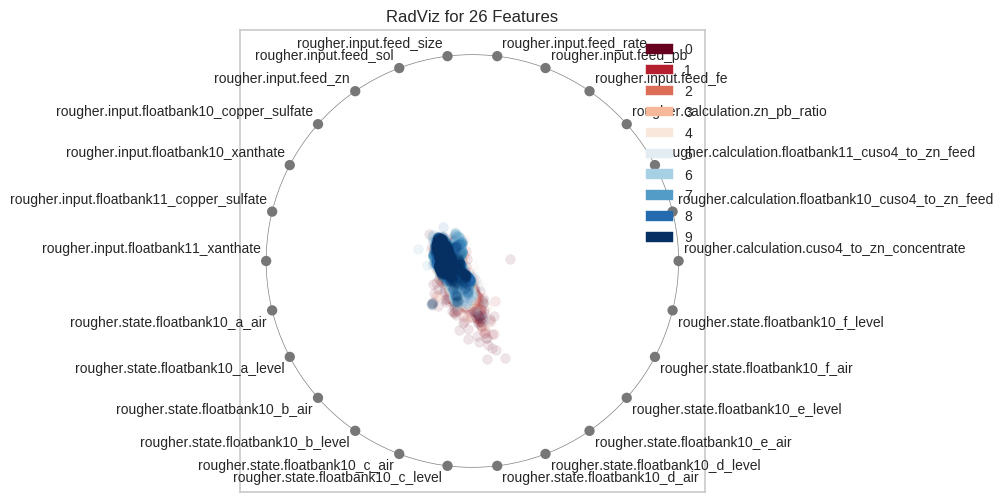

In [350]:
from yellowbrick.features import RadViz
from sklearn.preprocessing import RobustScaler
# Instantiate the visualizer
df_rad = df_train.filter(regex = '(rougher.(?!output))|rougher.output.recovery',axis =1)
df_rad = df_rad[df_rad['rougher.state.floatbank10_a_air'] > 800].dropna()
y_orig = df_rad['rougher.output.recovery']
y = pd.qcut(df_rad['rougher.output.recovery'],10,labels=False).values
df_rad.drop('rougher.output.recovery',axis=1,inplace = True)

X = df_rad

visualizer = RadViz(alpha = 0.1,size = (600,600),colormap='RdBu')

visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
visualizer.poof(outpath = '../reports/radviz.png')         # Draw/show/poof the data

Index(['rougher.calculation.cuso4_to_zn_concentrate',
       'rougher.calculation.floatbank10_cuso4_to_zn_feed',
       'rougher.calculation.floatbank11_cuso4_to_zn_feed',
       'rougher.calculation.zn_pb_ratio', 'rougher.input.feed_fe',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_zn', 'rougher.input.floatbank10_copper_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_copper_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.output.recovery',
       'rougher.state.floatbank10_a_air', 'rougher.state.floatbank10_a_level',
       'rougher.state.floatbank10_b_air', 'rougher.state.floatbank10_b_level',
       'rougher.state.floatbank10_c_air', 'rougher.state.floatbank10_c_level',
       'rougher.state.floatbank10_d_air', 'rougher.state.floatbank10_d_level',
       'rougher.state.floatbank10_e_air', 'rougher.state.floatbank10_e_level',
   

### Get the covariance matrix now w.r.t target

/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


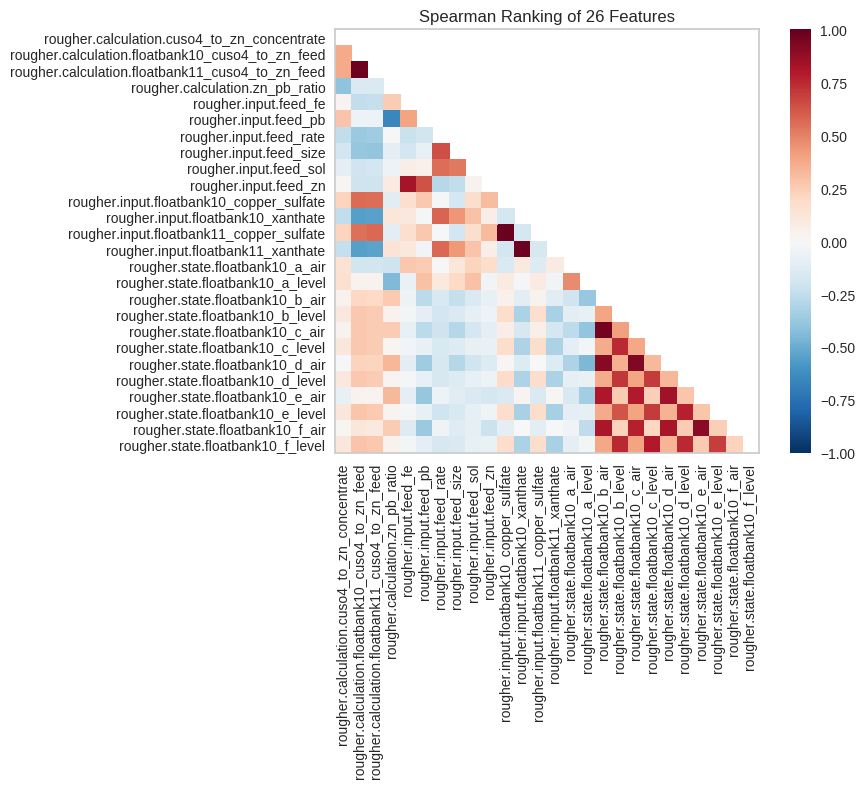

In [295]:
from yellowbrick.features import Rank2D

# Instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(algorithm='spearman')

visualizer.fit(X, y=None)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof(outpath = '../reports/correlation.png')     

C:\Users\abiryukov\AppData\Local\Continuum\anaconda3\envs\ocp\lib\site-packages\yellowbrick\features\rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


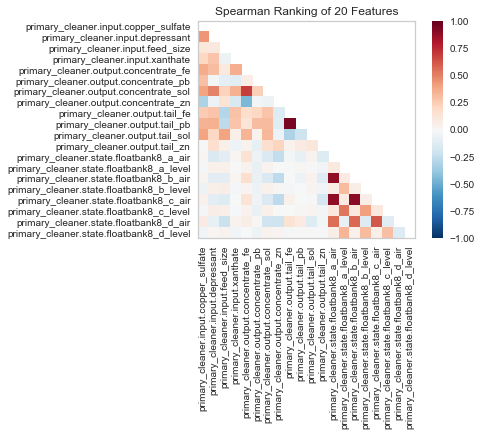

In [4]:
from yellowbrick.features import Rank2D

# Instantiate the visualizer with the Covariance ranking algorithm
Xp = df_train.filter(regex = '(primary.(?!output))|primary.output.recovery',axis =1).dropna()
visualizer = Rank2D(algorithm='spearman')

visualizer.fit(Xp, y=None)                # Fit the data to the visualizer
visualizer.transform(Xp)             # Transform the data
visualizer.poof(outpath = '../reports/correlation_primary.png')     

### Get the parallel coordinates plot

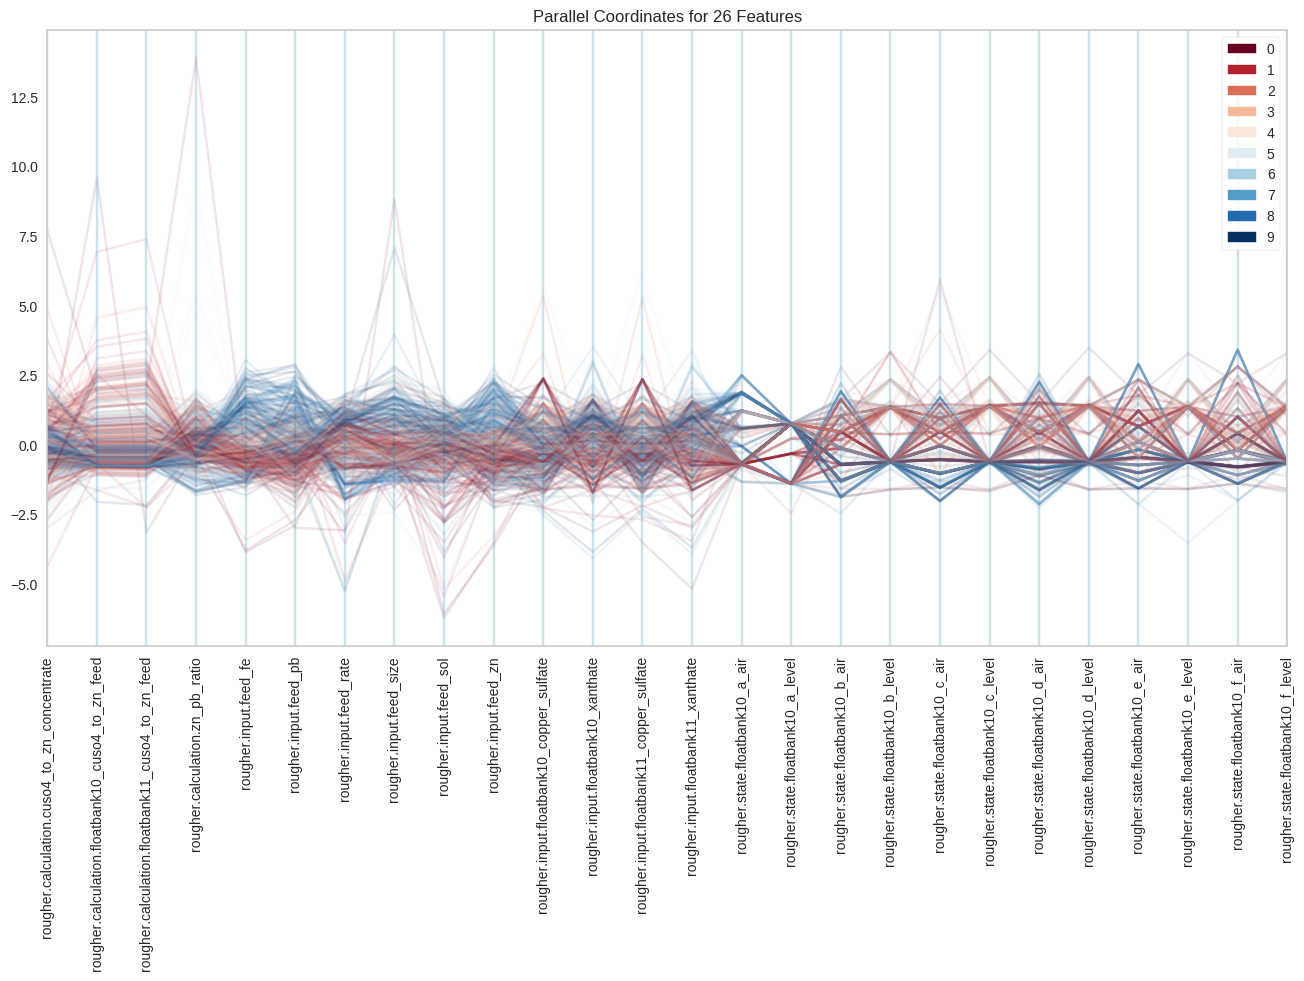

In [296]:
from yellowbrick.features import ParallelCoordinates
fig,ax = plt.subplots()

# Instantiate the visualizer
visualizer = ParallelCoordinates(ax =ax,
    normalize='standard', sample=0.05, shuffle=True,size = (1600,800),colormap='RdBu',alpha=0.1,vlines_kwds={'alpha':0.2})

# Fit the visualizer and display it
visualizer.fit_transform(X, y)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
visualizer.poof(outpath = '../reports/parr_coords_rougher.png')


### Project the data onto principal component space, color by target

/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])
/home/geoanton/anaconda3/envs/zinc/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


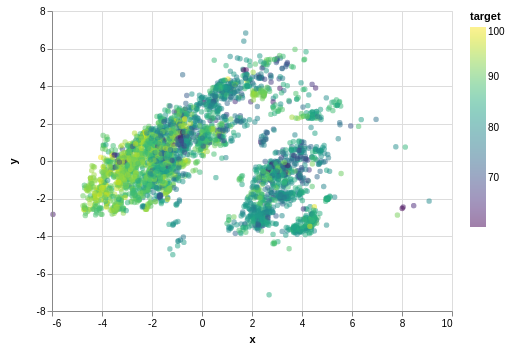

In [301]:
from yellowbrick.features.pca import PCADecomposition
fig,ax  = plt.subplots(figsize = (10,10))
y_pca = y_orig.values
visualizer = PCADecomposition(scale=True,ax =ax)
X_new = visualizer.fit_transform(X, y_pca);
plt.close()
pca_df = pd.DataFrame(data = X_new,columns=['x','y'])
pca_df['target'] = y_pca
pca_df = pca_df[pca_df['target'] > 60]
ch =alt.Chart(data=pca_df.sample(frac = 0.3)).mark_point(filled=True).encode(
x='x',
y='y',
color=alt.Color('target', scale=alt.Scale(scheme='viridis')),
opacity = alt.value(0.5))
ch.save('../reports/pca_rougher.png')
ch

### Try to see if manifolds are breaking the target 'apart'

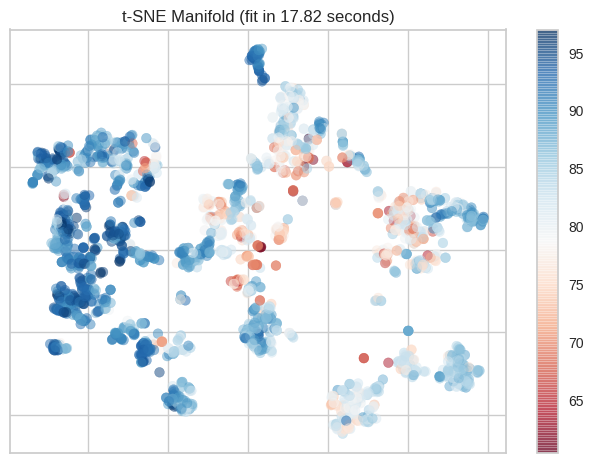

In [342]:
from yellowbrick.features.manifold import Manifold

X_man = X.copy()
    
X_man['y'] = y_pca
X_man = X_man[(X_man['y'] > 60) & (X_man['y'] <97) ]
X_man = X_man.sample(frac = 0.2)

visualizer = Manifold(manifold='tsne', target='continuous',alpha= 0.5,method='dense',n_neighbors = 50)
visualizer.manifold.set_params(**{'perplexity':50,'learning_rate':300,'random_state':123})

visualizer.manifold
visualizer.fit_transform(StandardScaler().fit_transform(X_man.drop('y',axis = 1)),X_man['y'])
visualizer.poof(outpath = '../reports/tsne_rougher.png')

### Lets look at the mutual information criterion as a a measure of 'correlation' between a feature and the target

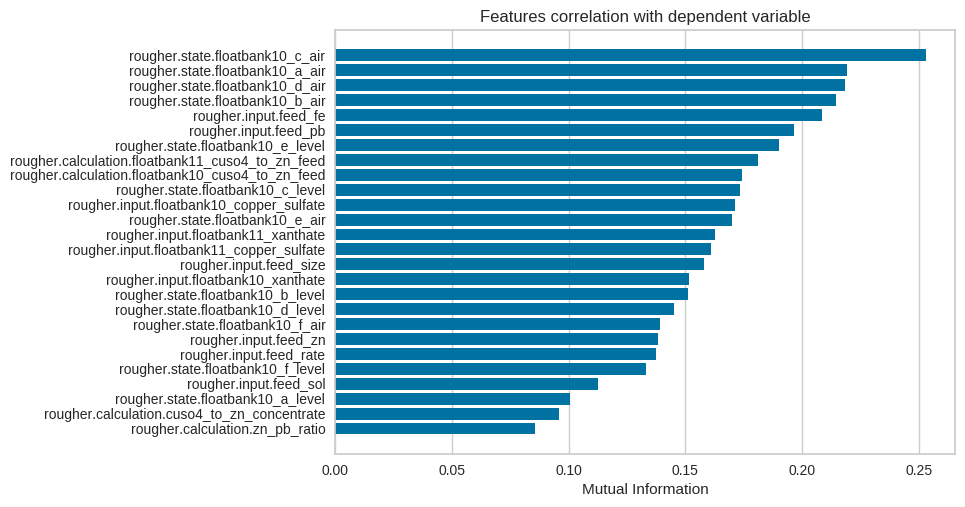

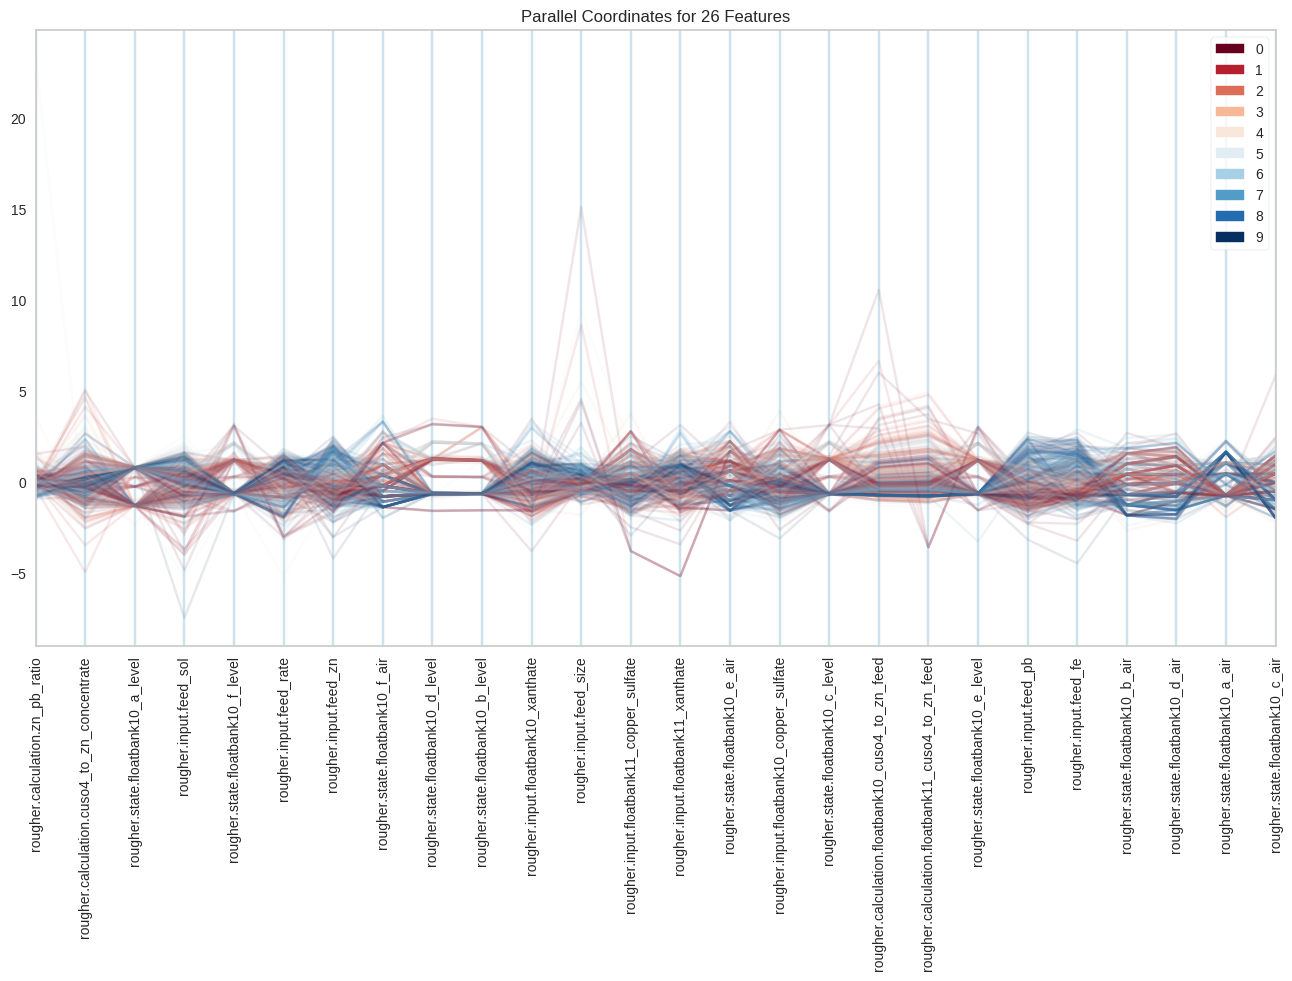

In [356]:
from yellowbrick.target import FeatureCorrelation

X_mi = X.copy()
    
X_mi['y'] = y_pca
X_mi = X_mi[(X_mi['y'] > 60) & (X_mi['y'] <99) ]
X_mi = X_mi.sample(frac = 0.2)

visualizer = FeatureCorrelation(method='mutual_info-regression',
                                labels=X.columns,sort=True)
visualizer.fit(StandardScaler().fit_transform(X_man.drop('y',axis = 1)),X_man['y'], random_state=0)
visualizer.poof('../reports/MI_rougher.png')


fig,ax = plt.subplots();
visualizer_pc = ParallelCoordinates(ax =ax,
    normalize='standard', sample=0.05, shuffle=True,size = (1600,800),colormap='RdBu',alpha=0.1,vlines_kwds={'alpha':0.2})

# Fit the visualizer and display it
visualizer_pc.fit_transform(X[visualizer.features_],y)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
visualizer_pc.poof(outpath = '../reports/parr_coords_rougher_ord.png')



In [355]:
visualizer.features_

array(['rougher.calculation.zn_pb_ratio',
       'rougher.calculation.cuso4_to_zn_concentrate',
       'rougher.state.floatbank10_a_level', 'rougher.input.feed_sol',
       'rougher.state.floatbank10_f_level', 'rougher.input.feed_rate',
       'rougher.input.feed_zn', 'rougher.state.floatbank10_f_air',
       'rougher.state.floatbank10_d_level',
       'rougher.state.floatbank10_b_level',
       'rougher.input.floatbank10_xanthate', 'rougher.input.feed_size',
       'rougher.input.floatbank11_copper_sulfate',
       'rougher.input.floatbank11_xanthate',
       'rougher.state.floatbank10_e_air',
       'rougher.input.floatbank10_copper_sulfate',
       'rougher.state.floatbank10_c_level',
       'rougher.calculation.floatbank10_cuso4_to_zn_feed',
       'rougher.calculation.floatbank11_cuso4_to_zn_feed',
       'rougher.state.floatbank10_e_level', 'rougher.input.feed_pb',
       'rougher.input.feed_fe', 'rougher.state.floatbank10_b_air',
       'rougher.state.floatbank10_d_air',
       

Build Dependency values: i.e. how well we can predict one column from others


In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from tqdm import trange
DROPCOLS = ['rougher.input.floatbank10_copper_sulfate',
            'rougher.input.floatbank10_xanthate',
            'rougher.state.floatbank10_b_air',
            'rougher.state.floatbank10_e_air',
            'rougher.state.floatbank10_f_air',
            'primary_cleaner.state.floatbank8_b_air',
            'primary_cleaner.state.floatbank8_c_air',
            "secondary_cleaner.state.floatbank4_b_air",
            'secondary_cleaner.state.floatbank2_b_air',
            "secondary_cleaner.state.floatbank5_b_air",
            "secondary_cleaner.state.floatbank3_a_air",
            "secondary_cleaner.state.floatbank4_a_air",
            "rougher.state.floatbank10_d_level",
            "rougher.state.floatbank10_b_level",
            "secondary_cleaner.state.floatbank6_a_air",
            "secondary_cleaner.state.floatbank3_b_air",
            "secondary_cleaner.state.floatbank2_a_level",
            "rougher.state.floatbank10_a_level",
            "rougher.state.floatbank10_c_level",
            "primary_cleaner.state.floatbank8_a_level",
            "rougher.state.floatbank10_f_level",
            "rougher.state.floatbank10_d_air"            
            ]


Xdep = df_train.filter(regex = 'input|state',axis =1).dropna().sample(frac=0.33)#.drop(DROPCOLS,axis=1)
scores = {}
for i in trange(Xdep.columns.shape[0]):
    col = Xdep.columns[i]
    y=Xdep[col]
    X=Xdep.drop(col,axis = 1)
    rf = RandomForestRegressor(n_estimators=100,n_jobs=-1)
    scores[col] = cross_val_score(rf,X,y,cv=5,scoring='r2')

  0%|                                                                                           | 0/52 [00:00<?, ?it/s]


KeyboardInterrupt: 

In [46]:
score_df =pd.DataFrame(scores).mean().T.sort_values(ascending=False)
large =score_df > 0.94
df = pd.DataFrame(data={"score":score_df,"large":large}).reset_index()
df.sort_values(by = ['score','index'],ascending=False)

,index,score,large
0,rougher.state.floatbank10_c_level,0.985689,True
1,primary_cleaner.state.floatbank8_a_level,0.979745,True
2,rougher.state.floatbank10_d_air,0.974157,True
3,rougher.state.floatbank10_e_level,0.972924,True
4,rougher.state.floatbank10_f_level,0.972235,True
5,rougher.input.feed_zn,0.957530,True
6,primary_cleaner.state.floatbank8_b_level,0.948429,True
7,primary_cleaner.state.floatbank8_c_level,0.935592,False
8,primary_cleaner.state.floatbank8_a_air,0.935479,False
9,primary_cleaner.state.floatbank8_d_air,0.934566,False


Build PCA, see what number of features gives 0.98 of variance:

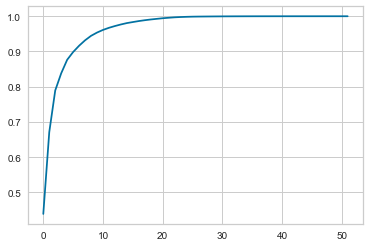

In [53]:
from sklearn.decomposition import PCA

pc =PCA().fit(Xdep)
plt.plot(np.cumsum(pc.explained_variance_ratio_))

In [56]:
(np.cumsum(pc.explained_variance_ratio_) <=0.996).sum()

22

# Target distributions


 mu = 51646891.29 and sigma = 18076793.16



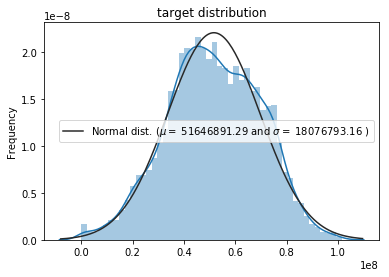

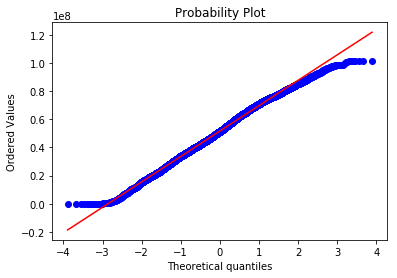

In [6]:

from scipy import stats
from scipy.stats import norm, skew, boxcox #for some statistics

lam = 3
target = df_train['rougher.output.recovery']
bc = boxcox(target[target > 0])
target = bc[0]
lam = bc[1]

#Check the new distribution 
target = target[target > 0]

sns.distplot(target , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(target)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('target distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(target, plot=plt)
plt.show()

In [8]:
#target = df_train['rougher.output.recovery']
lam
#boxcox(target[target > 0])

4.32105639603319

#  A bit more on feature importances:

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
import os
import sys
from ocp_table_tpot.globals import Globals as gd
from tpot import TPOTRegressor
sys.path.insert(0,'..')
from src.models.model import HistoricalMedian,XGBoost,LinearModel,RF,KNN,SVM,mase,TimeSeriesSplitImproved
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler,MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from skgarden.quantile import RandomForestQuantileRegressor
from sklearn.metrics import mean_squared_error,make_scorer
from sklearn.preprocessing import FunctionTransformer
from copy import copy
from tpot.builtins import StackingEstimator
from lightgbm import LGBMRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.pipeline import make_pipeline, make_union

In [ ]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.15, max_depth=12, 
                             n_estimators=500,
                             reg_alpha=0.4, reg_lambda=0.8,
                             subsample=0.5, silent=1,
                             random_state =7, nthread = -1)